## Libraries

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

## Dataset

In [34]:
df = pd.read_csv("C:\\Users\\AJIT\\Desktop\\Data science\\Deep Learning\\Code\\NSL-KDD\\KDDTrain.csv")
df_test = pd.read_csv("C:\\Users\\AJIT\\Desktop\\Data science\\Deep Learning\\Code\\NSL-KDD\\KDDTest.csv")
#df_test21 = pd.read_csv("C:\\Users\\AJIT\\Desktop\\Data science\\Deep Learning\\Code\\NSL-KDD\\KDDTest-21.csv")

In [35]:
df['Type']='Train'
df_test['Type']='Test'
#df_test21['Type']='Test21'
data= pd.concat([df,df_test],axis=0) 

In [36]:
data.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,Type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,Train
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,Train
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly,Train
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,Train
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,Train


## Statistical Summary

In [37]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,148517.000000,1.485170e+05,1.485170e+05,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,...,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000
mean,276.779305,4.022795e+04,1.708885e+04,0.000215,0.020523,0.000202,0.189379,0.004323,0.402789,0.255062,...,183.928042,119.462661,0.534521,0.084103,0.145932,0.030584,0.256122,0.251304,0.136220,0.136397
std,2460.683131,5.409612e+06,3.703525e+06,0.014677,0.240069,0.019417,2.013160,0.072248,0.490461,22.231375,...,98.528328,111.232318,0.448061,0.194102,0.308638,0.108975,0.428500,0.429719,0.322741,0.335282
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,87.000000,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.050000,0.010000,0.600000,0.500000,0.000000,0.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Label Encoding

In [38]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data["protocol_type"] = labelencoder.fit_transform(data["protocol_type"])
data["service"] = labelencoder.fit_transform(data["service"])
data["flag"] = labelencoder.fit_transform(data["flag"])
data["class"] = labelencoder.fit_transform(data["class"])

In [39]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,Type
0,0,1,20,9,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1,Train
1,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1,Train
2,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0,Train
3,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1,Train
4,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,Train


# One-Hot-Encoding

In [40]:
data=pd.concat([data,pd.get_dummies(data["protocol_type"],prefix="protocol_type")],axis=1).drop(["protocol_type"],axis=1)
data=pd.concat([data,pd.get_dummies(data["service"],prefix="service")],axis=1).drop(["service"],axis=1)
data=pd.concat([data,pd.get_dummies(data["flag"],prefix="flag")],axis=1).drop(["flag"],axis=1)

In [41]:
data.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_1,flag_2,flag_3,flag_4,flag_5,flag_6,flag_7,flag_8,flag_9,flag_10
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [42]:
train=data[data['Type']=='Train']
test=data[data['Type']=='Test']
#test21=data[data['Type']=='Test21']

In [43]:
test.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_1,flag_2,flag_3,flag_4,flag_5,flag_6,flag_7,flag_8,flag_9,flag_10
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,12983,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,15,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


### Features & Target 

In [31]:
my_cols = set(train.columns)
my_cols.remove('class')
my_cols.remove('Type')
my_cols = list(my_cols)
X_train = train[my_cols]
y_train=train["class"]

In [13]:
my_cols = set(test.columns)
my_cols.remove('class')
my_cols.remove('Type')
my_cols = list(my_cols)
X_test = test[my_cols]
y_test=test["class"]

In [14]:
my_cols = set(test21.columns)
my_cols.remove('class')
my_cols.remove('Type')
my_cols = list(my_cols)
X_test21 = test21[my_cols]
y_test21=test21["class"]

In [15]:
X_train.head()

,service_34,flag_0,service_50,flag_7,srv_diff_host_rate,rerror_rate,service_18,protocol_type_0,service_17,service_69,...,dst_host_srv_rerror_rate,service_1,service_47,count,service_62,service_52,num_root,flag_4,dst_host_same_src_port_rate,service_9
0,0,0,0,0,0.00,0.0,0,0,0,0,...,0.00,0,0,2,0,0,0,0,0.17,0
1,0,0,0,0,0.00,0.0,0,0,0,0,...,0.00,0,0,13,0,0,0,0,0.88,0
2,0,0,0,0,0.00,0.0,0,0,0,0,...,0.00,0,0,123,0,0,0,0,0.00,0
3,0,0,0,0,0.00,0.0,0,0,0,0,...,0.01,0,0,5,0,0,0,0,0.03,0
4,0,0,0,0,0.09,0.0,0,0,0,0,...,0.00,0,0,30,0,0,0,0,0.00,0


### PCA

In [124]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [125]:
from sklearn.decomposition import PCA
pca = PCA(.90)   

In [126]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [127]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [128]:
X_train.shape

(125973, 82)

###  feature importances using Random Forest

In [129]:
#https://chrisalbon.com/machine_learning/trees_and_forests/feature_selection_using_random_forest/
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [130]:
clf = RandomForestClassifier(random_state=0, n_jobs=-1)
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(X_train.columns, clf.feature_importances_):
    print(feature)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
sfm = SelectFromModel(clf, threshold=0.0009)
sfm.fit(X_train, y_train)

In [278]:
for feature_list_index in sfm.get_support(indices=True):
    print(X_train.columns[feature_list_index])

count
num_compromised
service_24
dst_host_count
dst_host_srv_serror_rate
dst_host_same_src_port_rate
service_19
src_bytes
protocol_type_0
serror_rate
dst_host_serror_rate
service_49
duration
dst_bytes
service_14
dst_host_srv_count
service_20
service_15
srv_diff_host_rate
dst_host_same_srv_rate
dst_host_srv_rerror_rate
dst_host_rerror_rate
dst_host_diff_srv_rate
flag_1
wrong_fragment
diff_srv_rate
hot
same_srv_rate
dst_host_srv_diff_host_rate
srv_count
flag_9
rerror_rate
protocol_type_1
srv_serror_rate
logged_in
protocol_type_2


In [279]:
X_train = sfm.transform(X_train)
X_test = sfm.transform(X_test)

In [280]:
X_train.shape

(125973, 36)

### Bagging meta-estimator

In [32]:
from sklearn.model_selection import KFold 
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 

for train_index, test_index in kf.split(X):
      print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

IndentationError: unindent does not match any outer indentation level (<ipython-input-32-63511164fd08>, line 6)

In [16]:
## PCA - 70% 
## Accuracy - 82%
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
bme = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
bme.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [17]:
from sklearn.metrics import accuracy_score
bme=bme.score(X_test,y_test)
bme

0.8180890702625976

### Random Forest

In [18]:
### PCA - 90%
### Accuracy - 81%
random.seed(500)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
from sklearn.metrics import accuracy_score
pr = rf.predict(X_test)
rf = accuracy_score(pr,y_test)
rf

0.7931600425833925

## AdaBoost

In [20]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [21]:
from sklearn.metrics import accuracy_score
pr = ada.predict(X_test)
ada = accuracy_score(pr,y_test)
ada

0.7848651525904897

### GBM

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
random_state=900
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [23]:
from sklearn.metrics import accuracy_score
pr = model.predict(X_test)
gbm = accuracy_score(pr,y_test)
gbm

0.8071327182398864

##### Tunning GBM

In [105]:
from sklearn.ensemble import GradientBoostingClassifier
random_state=900
model = GradientBoostingClassifier(n_estimators=50,max_depth=5,min_samples_leaf=10,learning_rate=0.25)
 
model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.25, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=10, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [106]:
from sklearn.metrics import accuracy_score
pr = model.predict(X_test)
gbm = accuracy_score(pr,y_test)
gbm

0.7837118523775728

In [ ]:
n_estimators = [100,400,800,1200,1600,2000]
#learning_rates = [1, 0.5, '0.25', 0.1, 0.05, 0.01]
train_results = []
test_results = []
for estimator in n_estimators:
   model = GradientBoostingClassifier(n_estimators=estimator)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   accuracy = accuracy_score(train_pred,y_train)
   train_results.append(accuracy)
   y_pred = model.predict(X_test)
   accuracy = accuracy_score(y_pred,y_test)
   test_results.append(accuracy)

In [ ]:
test_results

In [ ]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label='Train Accuracy')
line2, = plt.plot(learning_rates, test_results, 'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('learning rate')
plt.show()

### XG Boost

In [24]:
import xgboost as xgb

In [25]:
xg=xgb.XGBClassifier()
xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [26]:
from sklearn.metrics import accuracy_score
pr = xg.predict(X_test)
xg = accuracy_score(pr,y_test)
xg

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7949787083037615

### Light GBM

In [27]:
import lightgbm as lgb

In [28]:
lg = lgb.LGBMClassifier(silent=False)
lg.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=False,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [29]:
from sklearn.metrics import accuracy_score
pr = lg.predict(X_test)
lightgbm = accuracy_score(pr,y_test)
lightgbm

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7913413768630234

### Cat Boost

In [30]:
import catboost as cb

In [31]:
cbo=cb.CatBoostClassifier()

In [32]:
clf = cb.CatBoostClassifier()
clf.fit(X_train,y_train)

Learning rate set to 0.065842
0:	learn: 0.5248970	total: 523ms	remaining: 8m 42s
1:	learn: 0.4081747	total: 754ms	remaining: 6m 16s
2:	learn: 0.3327326	total: 959ms	remaining: 5m 18s
3:	learn: 0.2654475	total: 1.15s	remaining: 4m 45s
4:	learn: 0.2113934	total: 1.36s	remaining: 4m 30s
5:	learn: 0.1769431	total: 1.55s	remaining: 4m 16s
6:	learn: 0.1455030	total: 1.76s	remaining: 4m 9s
7:	learn: 0.1221666	total: 1.94s	remaining: 4m
8:	learn: 0.1094240	total: 2.07s	remaining: 3m 48s
9:	learn: 0.1001640	total: 2.22s	remaining: 3m 39s
10:	learn: 0.0903198	total: 2.41s	remaining: 3m 37s
11:	learn: 0.0796746	total: 2.73s	remaining: 3m 45s
12:	learn: 0.0723230	total: 2.92s	remaining: 3m 41s
13:	learn: 0.0657732	total: 3.13s	remaining: 3m 40s
14:	learn: 0.0601190	total: 3.32s	remaining: 3m 37s
15:	learn: 0.0558173	total: 3.51s	remaining: 3m 36s
16:	learn: 0.0520343	total: 3.79s	remaining: 3m 39s
17:	learn: 0.0487281	total: 3.99s	remaining: 3m 37s
18:	learn: 0.0462181	total: 4.14s	remaining: 3m 3

158:	learn: 0.0078778	total: 23.3s	remaining: 2m 3s
159:	learn: 0.0078391	total: 23.4s	remaining: 2m 2s
160:	learn: 0.0078135	total: 23.6s	remaining: 2m 2s
161:	learn: 0.0077459	total: 23.7s	remaining: 2m 2s
162:	learn: 0.0076985	total: 23.9s	remaining: 2m 2s
163:	learn: 0.0076826	total: 24s	remaining: 2m 2s
164:	learn: 0.0076500	total: 24.2s	remaining: 2m 2s
165:	learn: 0.0076372	total: 24.3s	remaining: 2m 2s
166:	learn: 0.0076119	total: 24.4s	remaining: 2m 1s
167:	learn: 0.0076026	total: 24.5s	remaining: 2m 1s
168:	learn: 0.0075239	total: 24.7s	remaining: 2m 1s
169:	learn: 0.0074656	total: 24.8s	remaining: 2m 1s
170:	learn: 0.0074574	total: 25s	remaining: 2m 1s
171:	learn: 0.0074527	total: 25.1s	remaining: 2m 1s
172:	learn: 0.0074381	total: 25.3s	remaining: 2m
173:	learn: 0.0074154	total: 25.4s	remaining: 2m
174:	learn: 0.0073831	total: 25.6s	remaining: 2m
175:	learn: 0.0073518	total: 25.7s	remaining: 2m
176:	learn: 0.0072723	total: 26s	remaining: 2m
177:	learn: 0.0072269	total: 26.1

316:	learn: 0.0041362	total: 43.9s	remaining: 1m 34s
317:	learn: 0.0041322	total: 44s	remaining: 1m 34s
318:	learn: 0.0041168	total: 44.1s	remaining: 1m 34s
319:	learn: 0.0041117	total: 44.3s	remaining: 1m 34s
320:	learn: 0.0041012	total: 44.4s	remaining: 1m 33s
321:	learn: 0.0040797	total: 44.5s	remaining: 1m 33s
322:	learn: 0.0040753	total: 44.6s	remaining: 1m 33s
323:	learn: 0.0040715	total: 44.7s	remaining: 1m 33s
324:	learn: 0.0040687	total: 44.8s	remaining: 1m 33s
325:	learn: 0.0040531	total: 45s	remaining: 1m 32s
326:	learn: 0.0040495	total: 45.1s	remaining: 1m 32s
327:	learn: 0.0040312	total: 45.2s	remaining: 1m 32s
328:	learn: 0.0040293	total: 45.3s	remaining: 1m 32s
329:	learn: 0.0040133	total: 45.4s	remaining: 1m 32s
330:	learn: 0.0040109	total: 45.5s	remaining: 1m 32s
331:	learn: 0.0039882	total: 45.6s	remaining: 1m 31s
332:	learn: 0.0039846	total: 45.8s	remaining: 1m 31s
333:	learn: 0.0039730	total: 45.9s	remaining: 1m 31s
334:	learn: 0.0039506	total: 46s	remaining: 1m 31s

473:	learn: 0.0028780	total: 1m 6s	remaining: 1m 13s
474:	learn: 0.0028771	total: 1m 6s	remaining: 1m 13s
475:	learn: 0.0028755	total: 1m 6s	remaining: 1m 13s
476:	learn: 0.0028643	total: 1m 6s	remaining: 1m 12s
477:	learn: 0.0028592	total: 1m 6s	remaining: 1m 12s
478:	learn: 0.0028455	total: 1m 6s	remaining: 1m 12s
479:	learn: 0.0028422	total: 1m 6s	remaining: 1m 12s
480:	learn: 0.0028372	total: 1m 7s	remaining: 1m 12s
481:	learn: 0.0028281	total: 1m 7s	remaining: 1m 12s
482:	learn: 0.0028211	total: 1m 7s	remaining: 1m 12s
483:	learn: 0.0028185	total: 1m 7s	remaining: 1m 11s
484:	learn: 0.0028071	total: 1m 7s	remaining: 1m 11s
485:	learn: 0.0028040	total: 1m 7s	remaining: 1m 11s
486:	learn: 0.0028002	total: 1m 7s	remaining: 1m 11s
487:	learn: 0.0027883	total: 1m 7s	remaining: 1m 11s
488:	learn: 0.0027878	total: 1m 8s	remaining: 1m 11s
489:	learn: 0.0027810	total: 1m 8s	remaining: 1m 10s
490:	learn: 0.0027776	total: 1m 8s	remaining: 1m 10s
491:	learn: 0.0027758	total: 1m 8s	remaining: 

629:	learn: 0.0021356	total: 1m 24s	remaining: 49.7s
630:	learn: 0.0021352	total: 1m 24s	remaining: 49.5s
631:	learn: 0.0021201	total: 1m 24s	remaining: 49.4s
632:	learn: 0.0021156	total: 1m 24s	remaining: 49.3s
633:	learn: 0.0021147	total: 1m 25s	remaining: 49.1s
634:	learn: 0.0021129	total: 1m 25s	remaining: 49s
635:	learn: 0.0021123	total: 1m 25s	remaining: 48.9s
636:	learn: 0.0021115	total: 1m 25s	remaining: 48.7s
637:	learn: 0.0021100	total: 1m 25s	remaining: 48.6s
638:	learn: 0.0021096	total: 1m 25s	remaining: 48.4s
639:	learn: 0.0021076	total: 1m 25s	remaining: 48.3s
640:	learn: 0.0021070	total: 1m 25s	remaining: 48.1s
641:	learn: 0.0021054	total: 1m 26s	remaining: 48s
642:	learn: 0.0021051	total: 1m 26s	remaining: 47.9s
643:	learn: 0.0021037	total: 1m 26s	remaining: 47.7s
644:	learn: 0.0020956	total: 1m 26s	remaining: 47.6s
645:	learn: 0.0020939	total: 1m 26s	remaining: 47.4s
646:	learn: 0.0020938	total: 1m 26s	remaining: 47.3s
647:	learn: 0.0020868	total: 1m 26s	remaining: 47.

785:	learn: 0.0017465	total: 1m 43s	remaining: 28.3s
786:	learn: 0.0017463	total: 1m 43s	remaining: 28.1s
787:	learn: 0.0017462	total: 1m 44s	remaining: 28s
788:	learn: 0.0017422	total: 1m 44s	remaining: 27.9s
789:	learn: 0.0017409	total: 1m 44s	remaining: 27.7s
790:	learn: 0.0017398	total: 1m 44s	remaining: 27.6s
791:	learn: 0.0017394	total: 1m 44s	remaining: 27.5s
792:	learn: 0.0017368	total: 1m 44s	remaining: 27.3s
793:	learn: 0.0017359	total: 1m 44s	remaining: 27.2s
794:	learn: 0.0017339	total: 1m 44s	remaining: 27.1s
795:	learn: 0.0017312	total: 1m 45s	remaining: 26.9s
796:	learn: 0.0017307	total: 1m 45s	remaining: 26.8s
797:	learn: 0.0017278	total: 1m 45s	remaining: 26.7s
798:	learn: 0.0017208	total: 1m 45s	remaining: 26.5s
799:	learn: 0.0017187	total: 1m 45s	remaining: 26.4s
800:	learn: 0.0017177	total: 1m 45s	remaining: 26.3s
801:	learn: 0.0017152	total: 1m 45s	remaining: 26.1s
802:	learn: 0.0017086	total: 1m 45s	remaining: 26s
803:	learn: 0.0017073	total: 1m 46s	remaining: 25.

942:	learn: 0.0014868	total: 2m 5s	remaining: 7.61s
943:	learn: 0.0014856	total: 2m 6s	remaining: 7.47s
944:	learn: 0.0014854	total: 2m 6s	remaining: 7.34s
945:	learn: 0.0014846	total: 2m 6s	remaining: 7.21s
946:	learn: 0.0014839	total: 2m 6s	remaining: 7.07s
947:	learn: 0.0014836	total: 2m 6s	remaining: 6.94s
948:	learn: 0.0014816	total: 2m 6s	remaining: 6.8s
949:	learn: 0.0014810	total: 2m 6s	remaining: 6.67s
950:	learn: 0.0014808	total: 2m 6s	remaining: 6.53s
951:	learn: 0.0014806	total: 2m 6s	remaining: 6.4s
952:	learn: 0.0014791	total: 2m 7s	remaining: 6.26s
953:	learn: 0.0014785	total: 2m 7s	remaining: 6.13s
954:	learn: 0.0014784	total: 2m 7s	remaining: 6s
955:	learn: 0.0014772	total: 2m 7s	remaining: 5.86s
956:	learn: 0.0014744	total: 2m 7s	remaining: 5.73s
957:	learn: 0.0014741	total: 2m 7s	remaining: 5.59s
958:	learn: 0.0014699	total: 2m 7s	remaining: 5.46s
959:	learn: 0.0014643	total: 2m 7s	remaining: 5.33s
960:	learn: 0.0014641	total: 2m 7s	remaining: 5.19s
961:	learn: 0.001

In [33]:
from sklearn.metrics import accuracy_score
pr = clf.predict(X_test)
cat = accuracy_score(pr,y_test)
cat

0.8020759403832506

In [318]:
d = {'models': ['gbm','xg','cat','lightgbm','ada','bme','rf'], 'accuracy': [gbm,xg,cat,lightgbm,ada,bme,rf]}

In [319]:
df = pd.DataFrame(data=d)
df

,models,accuracy
0,gbm,0.807133
1,xg,0.794979
2,cat,0.804604
3,lightgbm,0.791341
4,ada,0.784865
5,bme,0.819952
6,rf,0.787527


In [321]:
df.to_csv("results.csv")

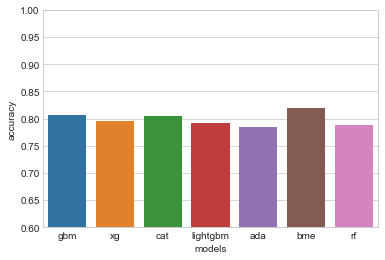

In [322]:
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
plt.ylim(0.6,1)
ax = sns.barplot(x="models", y = "accuracy" , data = df)